In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # Visualization
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns # Visualization
from sklearn.preprocessing import MinMaxScaler
import torch # Library for implementing Deep Neural Network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
# Loading the Apple.Inc Stock Data

import yfinance as yf
from datetime import date, timedelta, datetime

end_date = date.today().strftime("%Y-%m-%d") #end date for our data retrieval will be current date
start_date = '1990-01-01' # Beginning date for our historical data retrieval

df = yf.download('AAPL', start=start_date, end=end_date)# Function used to fetch the data


[*********************100%%**********************]  1 of 1 completed


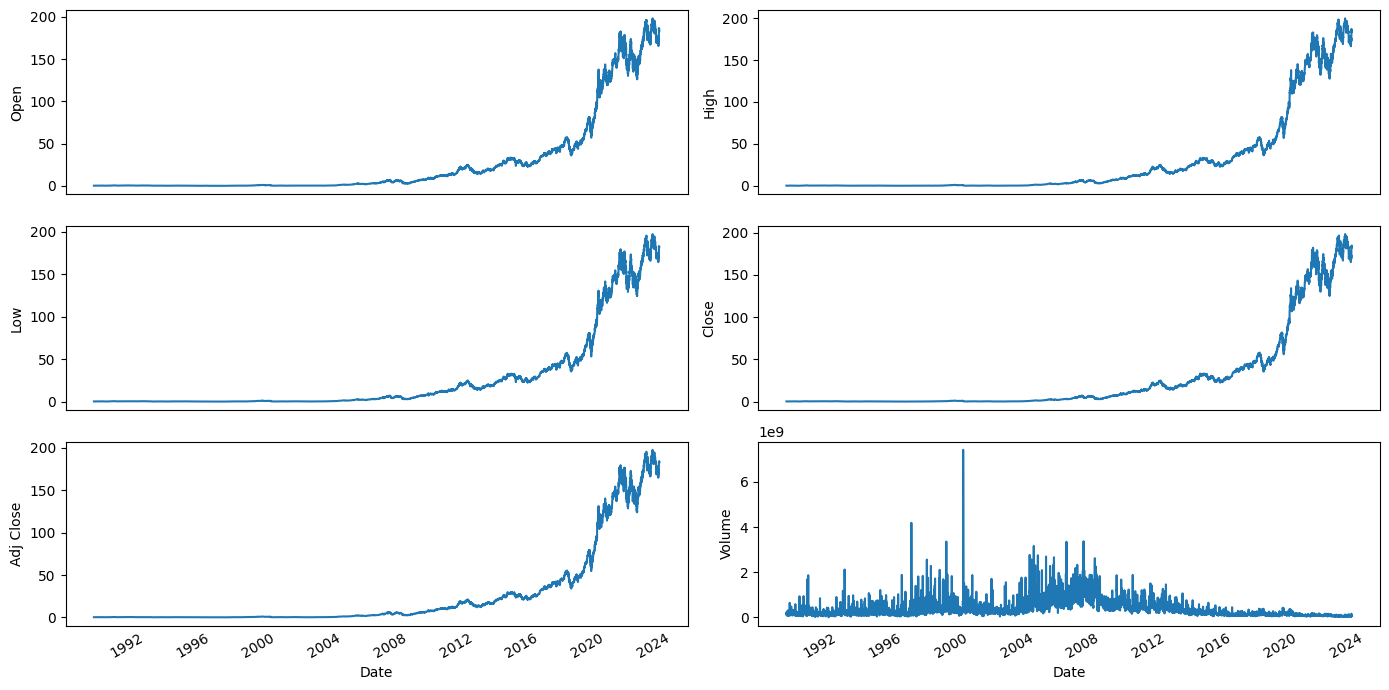

In [ ]:
def data_plot(df):
	df_plot = df.copy()

	ncols = 2
	nrows = int(round(df_plot.shape[1] / ncols, 0))

	fig, ax = plt.subplots(nrows=nrows, ncols=ncols,
						sharex=True, figsize=(14, 7))
	for i, ax in enumerate(fig.axes):
		sns.lineplot(data=df_plot.iloc[:, i], ax=ax)
		ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
		ax.xaxis.set_major_locator(mdates.AutoDateLocator())
	fig.tight_layout()
	plt.show()

data_plot(df)

In [ ]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.262722,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.264485,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.265367,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266249,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268012,101572800
...,...,...,...,...,...,...
2024-05-06,182.350006,184.199997,180.419998,181.710007,181.463882,78569700
2024-05-07,183.449997,184.899994,181.320007,182.399994,182.152924,77305800
2024-05-08,182.850006,183.070007,181.449997,182.740005,182.492477,45057100


In [ ]:
df['Open'].shift(-5)

Date
1990-01-02    0.339286
1990-01-03    0.335938
1990-01-04    0.323661
1990-01-05    0.305804
1990-01-08    0.308036
                ...   
2024-05-06         NaN
2024-05-07         NaN
2024-05-08         NaN
2024-05-09         NaN
2024-05-10         NaN
Name: Open, Length: 8656, dtype: float64

In [ ]:
time_shift = 7

target_data = df['Open'].shift(-time_shift)
data = df.iloc[:-time_shift]


In [ ]:
test_head = data.index[int(0.8*len(data))]
test_head

Timestamp('2017-06-16 00:00:00')

In [ ]:
df_train = df.loc[:test_head,:]
df_test = df.loc[test_head:,:]
target_train = target_data.loc[:test_head]
target_test = target_data.loc[test_head:]

In [ ]:
df_train

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.314732,0.334821,0.312500,0.332589,0.262722,183198400
1990-01-03,0.339286,0.339286,0.334821,0.334821,0.264485,207995200
1990-01-04,0.341518,0.345982,0.332589,0.335938,0.265367,221513600
1990-01-05,0.337054,0.341518,0.330357,0.337054,0.266249,123312000
1990-01-08,0.334821,0.339286,0.330357,0.339286,0.268012,101572800
...,...,...,...,...,...,...
2017-06-12,36.435001,36.522499,35.627499,36.355000,34.031033,289229200
2017-06-13,36.790001,36.862499,36.287498,36.647499,34.304832,136661600
2017-06-14,36.875000,36.875000,35.959999,36.290001,33.970196,126124800


In [ ]:
target_train

Date
1990-01-02          NaN
1990-01-03          NaN
1990-01-04          NaN
1990-01-05          NaN
1990-01-08          NaN
                ...    
2017-06-12    38.292500
2017-06-13    38.395000
2017-06-14    38.584999
2017-06-15    38.474998
2017-06-16    38.755001
Name: Open, Length: 6920, dtype: float64